In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.models as models

import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as T
from tqdm import tqdm

In [24]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


# Load and Visualize

In [25]:
class VehicleDataset(Dataset):
    
    def __init__(self, path, transform=None):
        data = np.load(path)
        self.images = data["images"]
        self.labels = data["labels"]
        self.transform = transform
        print("Images shape:", self.images.shape)
        print("Labels shape:", self.labels.shape)
        self.__combinelabels__()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        image_disp = image
        label = torch.tensor(label, dtype=torch.long)
        # mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        # std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        # image = (image - mean) / std

        # if self.transform:
        #     image = self.transform(image)
        
        return image, label

    # def with_transform(self, transform):
    #     new_ds = VehicleDataset.__new__(VehicleDataset)
    #     new_ds.images = self.images
    #     new_ds.labels = self.labels
    #     new_ds.transform = transform
    #     return new_ds
        
    def __combinelabels__(self):
        for idx, label in enumerate(self.labels):
            if label == 1:
                self.labels[idx] = 1
            if label >= 2 and label <= 7:
                self.labels[idx] = 2
            if label >= 8 and label <= 11:
                self.labels[idx] = 3
            if label >= 12 and label <= 25:
                self.labels[idx] = 4
            if label >= 26 and label <= 38:
               self.labels[idx] = 5
            if label >= 39 and label <= 44:
                self.labels[idx] = 6
            if label >= 45 and label <= 50:
                self.labels[idx] = 7
            if label >= 51 and label <= 53:
                self.labels[idx] = 8
            if label >= 54 and label <= 75:
                self.labels[idx] = 9
            if label >= 76 and label <= 81:
                self.labels[idx] = 10
            if label == 82:
                self.labels[idx] = 11
            if label >= 83 and label <= 97:
                self.labels[idx] = 12
            if label == 98:
                self.labels[idx] = 13
            if label >= 99 and label <= 100:
                self.labels[idx] = 14
            if label >= 101 and label <= 104:
                self.labels[idx] = 15
            if label == 105:
                self.labels[idx] = 16
            if label >= 106 and label <= 117:
                self.labels[idx] = 17
            if label >= 118 and label <= 122:
                self.labels[idx] = 18
            if label == 123:
                self.labels[idx] = 19
            if label >= 124 and label <= 125:
                self.labels[idx] = 20
            if label >= 126 and label <= 129:
                self.labels[idx] = 21
            if label >= 130 and label <= 140:
                self.labels[idx] = 22
            if label >= 141 and label <= 142:
                self.labels[idx] = 23
            if label == 143:
                self.labels[idx] = 24
            if label == 144:
                self.labels[idx] = 25
            if label >= 145 and label <= 149:
                self.labels[idx] = 26
            if label >= 150 and label <= 153:
                self.labels[idx] = 27
            if label >= 154 and label <= 155:
                self.labels[idx] = 28
            if label == 156:
                self.labels[idx] = 29
            if label == 157:
                self.labels[idx] = 30
            if label == 158:
                self.labels[idx] = 31
            if label == 159:
                self.labels[idx] = 32
            if label == 160:
                self.labels[idx] = 33
            if label >= 161 and label <= 166:
                self.labels[idx] = 34
            if label == 167:
                self.labels[idx] = 35
            if label >= 168 and label <= 171:
                self.labels[idx] = 36
            if label == 172:
                self.labels[idx] = 37
            if label == 173:
                self.labels[idx] = 38
            if label == 174:
                self.labels[idx] = 39
            if label >= 175 and label <= 177:
                self.labels[idx] = 40
            if label == 178:
                self.labels[idx] = 41
            if label >= 179 and label <= 180:
                self.labels[idx] = 42
            if label >= 181 and label <= 184:
                self.labels[idx] = 43
            if label == 185:
                self.labels[idx] = 44
            if label >= 186 and label <= 189:
                self.labels[idx] = 45
            if label >= 190 and label <= 192:
                self.labels[idx] = 46
            if label >= 193 and label <= 195:
                self.labels[idx] = 47
            if label == 196:
                self.labels[idx] = 48

In [26]:
dataset = VehicleDataset('../dataset/stanford_cars_dataset.npz')

batch_size = 32
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = int(len(dataset) - train_size - val_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# train_indices, val_indices, test_indices = random_split(
#     range(len(dataset)), [train_size, val_size, test_size],
#     generator=torch.Generator().manual_seed(42)
# )

# train_dataset = torch.utils.data.Subset(dataset.with_transform(None), train_indices)
# val_dataset   = torch.utils.data.Subset(dataset.with_transform(None), val_indices)
# test_dataset  = torch.utils.data.Subset(dataset.with_transform(None), test_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Images shape: (8144, 112, 112, 3)
Labels shape: (8144, 1)


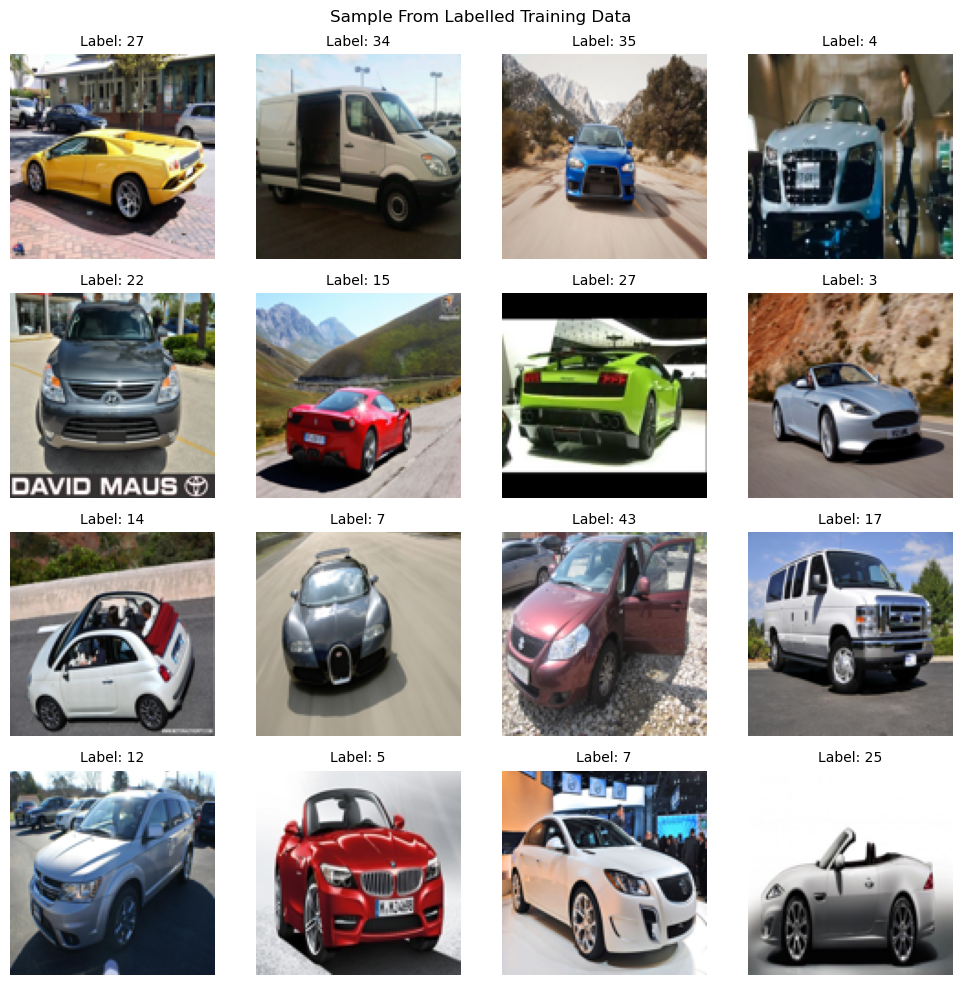

In [27]:
for images, labels in train_loader:
    break 

# Create figure
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i in range(16):
    img = images[i].permute(1, 2, 0).numpy() 
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {labels[i].item()}", fontsize=10)
    axes[i].axis("off")

plt.suptitle("Sample From Labelled Training Data")
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

# GoogLe Inception v1
- 64x64 input (vehicle image dataset)
- 196 Classes

In [36]:
class Inception(nn.Module):

    def __init__(self, in_channels, channels1x1, channels3x3_reduce, channels3x3, channels5x5_reduce, channels5x5, pool_proj):
        super(Inception, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels, channels1x1, kernel_size=1, bias=False),
            nn.BatchNorm2d(channels1x1),
            nn.ReLU(inplace=True)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels, channels3x3_reduce, kernel_size=1, bias=False),
            nn.BatchNorm2d(channels3x3_reduce),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels3x3_reduce, channels3x3, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(channels3x3),
            nn.ReLU(inplace=True)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels, channels5x5_reduce, kernel_size=1, bias=False),
            nn.BatchNorm2d(channels5x5_reduce),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels5x5_reduce, channels5x5, kernel_size=5, padding=2, bias=False),
            nn.BatchNorm2d(channels5x5),
            nn.ReLU(inplace=True)
        )

        self.block4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool_proj, kernel_size=1, bias=False),
            nn.BatchNorm2d(pool_proj),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        
        b1 = self.block1(x)
        b2 = self.block2(x)
        b3 = self.block3(x)
        b4 = self.block4(x)
        
        return torch.cat([b1, b2, b3, b4], 1)

In [37]:
class GoogLeNet(nn.Module):
    def __init__(self, num_classes=196):
        super(GoogLeNet, self).__init__()

        self.pre_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2)
        )

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(2, stride=2)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)

        self.inception5a = Inception(512, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        self.inception5a_replacement = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )
        self.inception5b_updated = Inception(512, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.7)
        self.fc = nn.Linear(1024, 48)

    def forward(self, x):
        x = self.pre_layers(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        #x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.maxpool4(x)

        x = self.inception5a_replacement(x)
        x = self.inception5b_updated(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Training

In [38]:
def train_model(model):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
    
        for images, labels in tqdm(train_loader):
            images = images.to(device)
            labels = labels[:,0].to(device) - 1

            # Forward
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            running_loss += loss.item() * images.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total

        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")
    
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels[:,0].to(device) - 1
            
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total
        print(f'Validation Acc: {val_acc:.4f}')

In [39]:
def train_model(model):
    model.to(device)
    criterion = nn.CrossEntropyLoss(label_smoothing=0.2)
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_val_acc = 0.0
    patience_counter = 0
    max_patience = 4

    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader):
            images = images.to(device)
            labels = labels[:, 0].to(device) - 1  # Assuming labels are (B,1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels[:, 0].to(device) - 1
                outputs = model(images)
                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total
        print(f"Validation Acc: {val_acc:.4f}")

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= max_patience:
                print("Early stopping.")
                break

        scheduler.step()

    print(f"\nBest Validation Accuracy: {best_val_acc:.4f}")

In [43]:
def convert_inception_key(key):
    # Handle inception blocks keys with your naming scheme
    
    for block in ['3a', '3b', '4a', '4b', '4c', '5a', '5b']:
        prefix = f'inception{block}.'
        if key.startswith(prefix):
            rest = key[len(prefix):]
            
            # Map branches with conv and bn explicitly
            # Example: branch1.conv.weight -> block1.0.weight (conv)
            #          branch1.bn.weight -> block1.1.weight (bn)
            
            # Replace branch1.conv -> block1.0
            if rest.startswith('branch1.conv'):
                rest = rest.replace('branch1.conv', 'block1.0')
            elif rest.startswith('branch1.bn'):
                rest = rest.replace('branch1.bn', 'block1.1')
            
            # branch2 has two conv+bn pairs:
            # branch2.0.conv -> block2.0
            # branch2.0.bn   -> block2.1
            # branch2.1.conv -> block2.3
            # branch2.1.bn   -> block2.4
            elif rest.startswith('branch2.0.conv'):
                rest = rest.replace('branch2.0.conv', 'block2.0')
            elif rest.startswith('branch2.0.bn'):
                rest = rest.replace('branch2.0.bn', 'block2.1')
            elif rest.startswith('branch2.1.conv'):
                rest = rest.replace('branch2.1.conv', 'block2.3')
            elif rest.startswith('branch2.1.bn'):
                rest = rest.replace('branch2.1.bn', 'block2.4')
            
            # branch3 also has two conv+bn pairs:
            # branch3.0.conv -> block3.0
            # branch3.0.bn   -> block3.1
            # branch3.1.conv -> block3.3
            # branch3.1.bn   -> block3.4
            elif rest.startswith('branch3.0.conv'):
                rest = rest.replace('branch3.0.conv', 'block3.0')
            elif rest.startswith('branch3.0.bn'):
                rest = rest.replace('branch3.0.bn', 'block3.1')
            elif rest.startswith('branch3.1.conv'):
                rest = rest.replace('branch3.1.conv', 'block3.3')
            elif rest.startswith('branch3.1.bn'):
                rest = rest.replace('branch3.1.bn', 'block3.4')
            
            # branch4 has only one conv+bn pair at .1:
            # branch4.1.conv -> block4.1
            # branch4.1.bn   -> block4.2
            elif rest.startswith('branch4.1.conv'):
                rest = rest.replace('branch4.1.conv', 'block4.1')
            elif rest.startswith('branch4.1.bn'):
                rest = rest.replace('branch4.1.bn', 'block4.2')
            
            # Return with original block prefix + new rest
            return f'inception{block}.{rest}'
    
    # Not an inception block key, ignore
    return None


# Load pretrained torchvision GoogLeNet weights
torchvision_model = models.googlenet(pretrained=True)
pretrained_dict = torchvision_model.state_dict()

# Your custom GoogLeNet model instance
custom_model = GoogLeNet()  # Replace with your custom model constructor
custom_dict = custom_model.state_dict()

# Filter and convert inception keys from pretrained to your model's keys
inception_weights = {}

for k, v in pretrained_dict.items():
    new_key = convert_inception_key(k)
    if new_key is None:
        # Ignore non-inception keys here (you can extend if needed)
        continue
    
    if new_key in custom_dict and v.shape == custom_dict[new_key].shape:
        inception_weights[new_key] = v
        # print(f"Adding weights for {new_key}")

# Update your model's state dict and load weights
custom_dict.update(inception_weights)
custom_model.load_state_dict(custom_dict)

print(f"Loaded {len(inception_weights)} inception layer parameters into custom GoogLeNet")

Loaded 241 inception layer parameters into custom GoogLeNet


In [44]:
train_model(custom_model.to(device))

100%|██████████| 179/179 [00:32<00:00,  5.50it/s]


Epoch 1/30 - Loss: 3.6393 - Accuracy: 0.1016
Validation Acc: 0.1130


100%|██████████| 179/179 [00:32<00:00,  5.48it/s]


Epoch 2/30 - Loss: 3.5290 - Accuracy: 0.1375
Validation Acc: 0.1482


100%|██████████| 179/179 [00:32<00:00,  5.47it/s]


Epoch 3/30 - Loss: 3.4433 - Accuracy: 0.1561
Validation Acc: 0.1376


100%|██████████| 179/179 [00:32<00:00,  5.47it/s]


Epoch 4/30 - Loss: 3.3509 - Accuracy: 0.1916
Validation Acc: 0.1892


100%|██████████| 179/179 [00:32<00:00,  5.48it/s]


Epoch 5/30 - Loss: 3.2356 - Accuracy: 0.2361
Validation Acc: 0.1425


100%|██████████| 179/179 [00:32<00:00,  5.47it/s]


Epoch 6/30 - Loss: 3.0661 - Accuracy: 0.3107
Validation Acc: 0.2359


100%|██████████| 179/179 [00:32<00:00,  5.47it/s]


Epoch 7/30 - Loss: 2.9656 - Accuracy: 0.3542
Validation Acc: 0.1982


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 8/30 - Loss: 2.8701 - Accuracy: 0.3926
Validation Acc: 0.2711


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 9/30 - Loss: 2.7596 - Accuracy: 0.4381
Validation Acc: 0.2858


100%|██████████| 179/179 [00:32<00:00,  5.46it/s]


Epoch 10/30 - Loss: 2.6559 - Accuracy: 0.4889
Validation Acc: 0.2776


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 11/30 - Loss: 2.5133 - Accuracy: 0.5551
Validation Acc: 0.3186


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 12/30 - Loss: 2.4555 - Accuracy: 0.5793
Validation Acc: 0.3129


100%|██████████| 179/179 [00:32<00:00,  5.47it/s]


Epoch 13/30 - Loss: 2.3998 - Accuracy: 0.6104
Validation Acc: 0.3391


100%|██████████| 179/179 [00:32<00:00,  5.43it/s]


Epoch 14/30 - Loss: 2.3399 - Accuracy: 0.6326
Validation Acc: 0.3104


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 15/30 - Loss: 2.2957 - Accuracy: 0.6581
Validation Acc: 0.3342


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 16/30 - Loss: 2.2399 - Accuracy: 0.6782
Validation Acc: 0.3497


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 17/30 - Loss: 2.2108 - Accuracy: 0.6888
Validation Acc: 0.3612


100%|██████████| 179/179 [00:33<00:00,  5.42it/s]


Epoch 18/30 - Loss: 2.1814 - Accuracy: 0.7086
Validation Acc: 0.3751


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 19/30 - Loss: 2.1574 - Accuracy: 0.7170
Validation Acc: 0.3514


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 20/30 - Loss: 2.1428 - Accuracy: 0.7240
Validation Acc: 0.3595


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 21/30 - Loss: 2.1103 - Accuracy: 0.7377
Validation Acc: 0.3743


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 22/30 - Loss: 2.1007 - Accuracy: 0.7491
Validation Acc: 0.3759


100%|██████████| 179/179 [00:33<00:00,  5.38it/s]


Epoch 23/30 - Loss: 2.0946 - Accuracy: 0.7461
Validation Acc: 0.3767


100%|██████████| 179/179 [00:33<00:00,  5.32it/s]


Epoch 24/30 - Loss: 2.0790 - Accuracy: 0.7537
Validation Acc: 0.3784


100%|██████████| 179/179 [00:33<00:00,  5.37it/s]


Epoch 25/30 - Loss: 2.0637 - Accuracy: 0.7642
Validation Acc: 0.3669


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 26/30 - Loss: 2.0509 - Accuracy: 0.7654
Validation Acc: 0.3743


100%|██████████| 179/179 [00:32<00:00,  5.44it/s]


Epoch 27/30 - Loss: 2.0486 - Accuracy: 0.7654
Validation Acc: 0.3759


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 28/30 - Loss: 2.0439 - Accuracy: 0.7742
Validation Acc: 0.3833


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 29/30 - Loss: 2.0386 - Accuracy: 0.7714
Validation Acc: 0.3849


100%|██████████| 179/179 [00:32<00:00,  5.45it/s]


Epoch 30/30 - Loss: 2.0255 - Accuracy: 0.7758
Validation Acc: 0.3817

Best Validation Accuracy: 0.3849


# Testing

In [45]:
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels[:,0].to(device) - 1
            
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

    # Concatenate all predictions and labels if needed for further analysis
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    
    return accuracy, all_preds, all_labels

In [46]:
torch.set_printoptions(profile="full")
test_model(custom_model, test_loader, device)

Test Accuracy: 0.3426


(0.3426001635322976,
 tensor([11,  3, 39, 21,  2,  8, 25,  8, 16, 25,  4,  8,  2,  6,  9,  4, 16, 21,
          2, 16,  8,  8, 16, 16,  5, 11,  3, 26, 11,  4,  3, 33,  9, 25,  8, 16,
         16, 20, 25, 20,  3, 11, 20, 11, 11, 14, 26,  3, 14, 20, 19,  8,  6,  3,
          3, 16, 25,  3,  9, 11,  8,  9, 27,  4, 11, 26,  5,  9, 11, 11, 21, 16,
          3, 11, 33, 21,  4,  4, 17, 11,  6,  6, 44, 17, 14,  8, 16, 42, 11, 17,
         42, 26, 44, 16, 16, 16,  5, 11,  4,  9,  8,  8, 16, 14, 25,  8, 14, 16,
         21,  4, 14,  8, 21, 13, 17, 42,  6,  4,  4,  8,  5,  9,  7, 14, 21,  4,
          3,  3,  9,  1,  5, 16, 16, 16,  8,  4, 14,  8, 17, 11,  8, 14, 11, 26,
          3,  3, 26, 17,  5, 11, 17,  8,  8,  8, 33,  4,  8,  1,  6,  6,  4,  3,
          5, 21, 11, 16, 11, 33, 35, 11, 16,  4, 11, 16,  2, 21,  9,  4, 17,  4,
         26, 11,  1,  6,  4, 16,  3, 16,  8,  3,  8,  4,  1,  1, 18, 11, 19,  9,
          8, 33,  9,  4,  1,  3,  3, 25,  9,  8, 14, 16,  8,  7,  4, 11,  9, 33,
       

In [ ]:
googlenet = GoogLeNet().to(device)
for k in googlenet.state_dict().keys():
    print(k)

In [ ]:
for k in pretrained_dict.keys():
    if k.startswith('inception'):
        print(k)